<a href="https://colab.research.google.com/github/PedroDS4/Implementacao_DFT_e_FFT/blob/main/Implementa%C3%A7%C3%A3o_DFT_e_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Definição das funções**

In [4]:
import numpy as np
import matplotlib.pyplot as plt


#Funções Importantes
def null_pad(x, N_0):
    N = len(x);
    y = np.zeros(int(N_0));
    for i in range(0,int(N_0)):
       if(i<N):
            y[i] = x[i];
       else:
            y[i] = 0;

    return y;



def W(N):
    return np.exp(-1j * 2 * np.pi / N);



def DFT(x_n,N_0):
    N = len(x_n);
    x_n = null_pad(x_n,N_0);
    X = np.zeros(N_0, dtype=complex);
    for k in range(N_0-1):
        sum = 0;
        for n in range(N_0-1):
            sum = sum + x_n[n]*W(N_0)**(k*n);
        X[k] = sum;

    return X



def IDFT(X_k,N_0):
    N = len(X_k);
    X_k = null_pad(X_k,N_0);
    x_n = np.zeros(N_0)
    for n in range(N_0-1):
        sum = 0;
        for k in range(N_0-1):
            sum = sum + X_k[k]*W(N_0)**(-k*n);
            x_n[n] = sum/N_0;

    return x_n;



def FFT_shift(X_k):
  N = len(X_k);
  X_sk = np.zeros(N, dtype=complex);
  for k in range(0,N):
    if k < N//2:
      X_sk[k] = X_k[k+N//2];
    else:
      X_sk[k] = X_k[k-N//2];

  return X_sk;



def getEven(x_n):
    even = [];
    for i in range(0,len(x_n),2):
        even.append(x_n[i]);
    return np.array(even);



def getOdd(x_n):
    odd = [];
    for i in range(1,len(x_n),2):
        odd.append(x_n[i]);
    return np.array(odd);



def FFT(x_n,N_0):
    """
    Parâmetros:
    x_n: Sinal de entrada
    N_0: Tamanho do sinal de entrada

    Retorno:
    X_k: Transformada rápida de fourier do sinal de entrada
    """
    if N_0 == 1:
      return x_n[0];
    else:
      even = getEven(x_n);
      odd = getOdd(x_n);
      W_n = np.exp(-2j * np.pi * np.arange(N_0//2) / N_0)
      even = FFT(even,N_0//2);
      odd = FFT(odd,N_0//2);
      return np.concatenate((even+W_n*odd,even-W_n*odd));



def IFFT(X_k,N_0):

    if N_0 == 1:
      return X_k[0]/N_0;
    else:
      even = getEven(X_k);
      odd = getOdd(X_k);
      W_n = np.exp(2j * np.pi * np.arange(N_0//2) / N_0)
      even = IFFT(even,N_0//2);
      odd = IFFT(odd,N_0//2);
      return np.concatenate((even+W_n*odd,even-W_n*odd));




#**Transformada de Fourier Discreta**
A transformada de fourier discreta é basicamente a discretização da transformada de fourier contínua, para que seja possível implementar num computador, que é digital, a integral de fourier se torna um somatório e no espectro o sinal espectral original é amostrado com frequência de amostragem $Ω_0$.

A transformada de fourier de um sinal é dada pela equação:

$$
X(\Omega) = ∫_{-∞}^{∞} x(t)e^{-j{\Omega}t}dt
$$

Essa integral pode ser discretizada, sabendo que o sinal $x[n]$ é o sinal x(t) aplicado em alguns instantes de tempo periódicos multiplos do período de amostragem $T_s$, então

$$
X(k{\Omega}_0) = ∑_{0}^{N_0-1} x(nT_s) \cdot e^{-jk{\Omega}_0t} \cdot T_s
$$

se agora definirmos $x[n] = T_s x(nT_s) $, a equação fica

$$
X(k{\Omega}_0) = ∑_{0}^{N_0-1} x[n] \cdot e^{-jk{\Omega}_0t}
$$



##**Demonstração formal da transformada de fourier discreta**
Seja um sinal x(t), a sua transformada de fourier de tempo contínuo é dada por

$$
X(\Omega) = ∫_{-∞}^{∞} x(t)e^{-j{\Omega}t}dt
$$

Considere ainda o sinal amostrado obtido a partir da amostragem do sinal $x(t)$

$$
\bar{x}(t) = \sum_{n = -∞}^{∞} x(nT_s) \delta (t - nT_s)
$$


Porém se calcularmos a transformada de fourier do sinal amostrado $\bar{x}(t)$, obtemos

$$
\bar{X}(\Omega) = ∫_{-∞}^{∞}   \sum_{n = -∞}^{∞} x(nT_s) \delta (t - nT_s) e^{-j{\Omega}t}dt
$$

Podemos ainda inverter a ordem do somatório com a integral

$$
\bar{X}(\Omega) = \sum_{n = -∞}^{∞}  ∫_{-∞}^{∞}  x(nT_s) \delta (t - nT_s) e^{-j{\Omega}t}dt
$$

e podemos ainda ver que o termo $x(nT_s)$ é uma constante em relação a t, então temos

$$
\bar{X}(\Omega) = \sum_{n = -∞}^{∞} x(nT_s)   ∫_{-∞}^{∞} \delta (t - nT_s) e^{-j{\Omega}t}dt
$$

agora utilizando a noção de integrais com impulso, vemos que o resultado dessa integral é o valor do da função exponencial no deslocamento do impulso, assim por fim temos

$$
\bar{X}(\Omega) = \sum_{n = -∞}^{∞} x(nT_s)  e^{-j\Omega nT_s}
$$

porém temos ainda que

$$
X(\Omega) = T_s \bar{X}(\Omega)
$$

assim a transformada de fourier do sinal fica

$$
X(\Omega) = \sum_{n = -∞}^{∞} T_s x(nT_s)  e^{-j\Omega nT_s}
$$

definindo $T_s x(nT_s) = x[n]$

temos enfim

$$
X(\Omega) = \sum_{n = -∞}^{∞} x[n]  e^{-j\Omega nT_s}
$$

agora discretizando a frequência como

$$
\Omega = k\Omega_0 = 2 k \pi f_0
$$

temos

$$
X(k \Omega_0) = \sum_{n = -∞}^{∞} x[n]  e^{-jk \Omega_0 nT_s}
$$

e por fim assumindo que

$$
f_0 \cdot T_s = \frac{T_s}{T_0} = \frac{1}{M}
$$

onde $M$ é o número de amostras espaçadas em $T_s$ no período $T_0$

chegamos na equação final da DFT, onde tempo e frequência estão discretizados, assim

$$
X(k \Omega_0) = \sum_{n = -∞}^{∞} x[n]  e^{-j 2\pi \frac{k}{M} n}
$$

**Complexidade da DFT**
A complexidade equivale ao número de iterações necessárias para realizar o algoritmo completamente
Para computarmos a DFT, temos que


##**Transformada rápida de fourier(FFT)**
A transformada rápida de fourier é um algorítmo que reduz a complexidade do cálculo da DFT, utilizando uma estrutura de implementação recursiva onde o sinal é decomposto em sub sinais a partir dos indices pares e impares, até esses sinais se tornarem uma única amostra, e a partir daí essa função recursiva calcula todas as amostras da FFT.

Seja um sinal discreto $x[n]$, a sua transformada de fourier pode ser calculada pela DFT como

$$
X[k] =  \sum_{n = -∞}^{∞} x[n]  e^{-j 2\pi \frac{k}{M} n}
$$

porém o sinal $x[n]$ pode ser decomposto da forma

$$
x_{odd}[n] = x[2n+1]
$$
que forma um novo sinal a partir das amostras ímpares do sinal $x[n]$ original.

$$
x_{even}[n] = x[2n]  
$$
que forma um novo sinal a partir das amostras pares do sinal $x[n]$ original, e podedemos calcular agora a DFT como

$$
X[k] =  \sum_{n = -∞}^{∞} x_{odd}[n]   e^{-j 2\pi \frac{k}{M} n}  + \sum_{n = -∞}^{∞} x_{even}[n]  e^{-j 2\pi \frac{k}{M} n}
$$

fazendo essa decomposição M vezes, recursivamente, até que

$$
x_{{odd}^M}[n] = y_0
$$

e

$$
x_{{even}^M}[n] = z_0
$$

onde $z_0$ e $y_0$ são números complexos, esse é o resultado final da função recursiva que implementa a FFT, cuja complexidade será demonstrada a seguir.


**Complexidade da FFT**




##**Ambiente de Simulação da DFT**

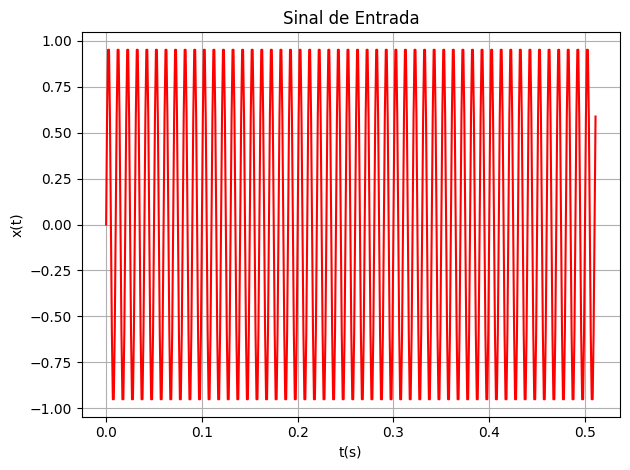

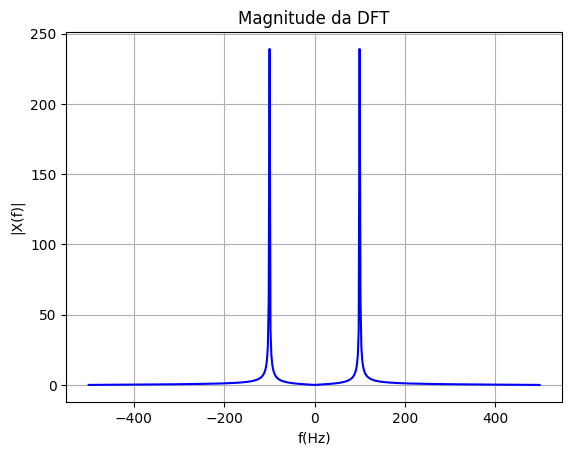

<Figure size 640x480 with 0 Axes>

In [3]:
#Definição dos parâmetros
T_s =  1e-3

N_0 = 512

T_0 = T_s * N_0

#Definindo o sinal de entrada
f_c = 100
t = np.arange(0, N_0)* T_s;
y = np.sin(2* np.pi * f_c * t);
y_n = y;


Y_k = FFT_shift(DFT(y_n,N_0));

#y_2= IFFT(FFT(y_n,N_0),N_0)

#Frequências discretas
f_0 = 1 / T_0;

f_k = np.arange(-N_0/2,N_0/2)*f_0;



#Plotando o sinal de entrada e a magnitude da DFT
plt.subplots();
plt.plot(t,y_n, 'r');
plt.title('Sinal de Entrada');
plt.xlabel('t(s)');
plt.ylabel('x(t)');
plt.grid();
plt.tight_layout();
# plt.xlim(0,5)
#plt.ylim(0,0.2)

plt.subplots();
plt.plot(f_k, abs(Y_k),'b');
plt.title('Magnitude da DFT');
plt.xlabel('f(Hz)');
plt.ylabel('|X(f)|');
plt.grid();
# plt.xlim(70,90)
plt.show();
plt.tight_layout();



##**Ambiente de Simulação da FFT**

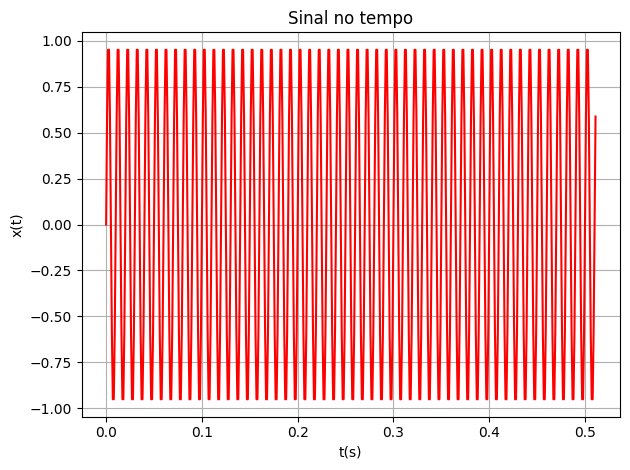

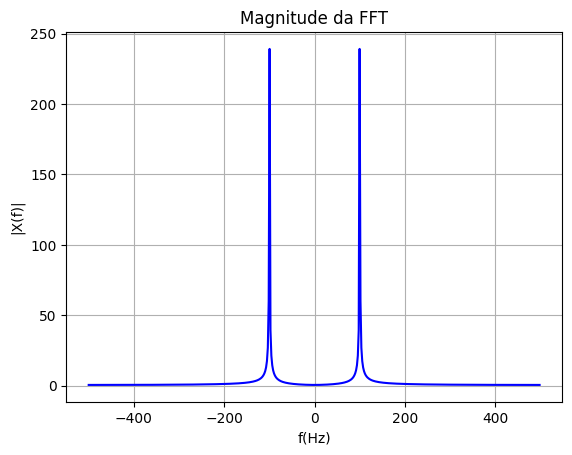

<Figure size 640x480 with 0 Axes>

In [5]:
#Definição dos parâmetros da FFT
T_s = 1e-3

N_0 = 512;

T_0 = T_s * N_0


#Definindo o sinal de entrada
f_c = 100
t = np.arange(0, N_0)*T_s;
y = np.sin(2* np.pi * f_c * t);
y_n = y;
Y_k = FFT_shift(FFT(y_n,N_0));


#y_2= IFFT(FFT(y_n,N_0),N_0)

#Frequências discretas
f_0 = 1 / T_0;
f_k = np.arange(-N_0/2,N_0/2)*f_0;


#Plotando o sinal de entrada e a magnitude da DFT
plt.subplots();
plt.plot(t,y_n, 'r');
plt.title('Sinal no tempo');
plt.xlabel('t(s)');
plt.ylabel('x(t)');
plt.grid();
plt.tight_layout();
# plt.xlim(0,5)
#plt.ylim(0,0.2)

plt.subplots();
plt.plot(f_k, abs(Y_k),'b');
plt.title('Magnitude da FFT');
plt.xlabel('f(Hz)');
plt.ylabel('|X(f)|');
plt.grid();
# plt.xlim(70,90)
plt.show();
plt.tight_layout();

